In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.2.0-rc3


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [18]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

### 定义和运行GRU model

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 16s 20ms/step - loss: 0.6689 - accuracy: 0.5680 - val_loss: 0.5860 - val_accuracy: 0.7394
Epoch 2/50
782/782 [==============================] - 15s 19ms/step - loss: 0.5861 - accuracy: 0.7460 - val_loss: 0.4994 - val_accuracy: 0.7874
Epoch 3/50
782/782 [==============================] - 15s 19ms/step - loss: 0.4299 - accuracy: 0.8368 - val_loss: 0.4206 - val_accuracy: 0.8302
Epoch 4/50
782/782 [==============================] - 15s 19ms/step - loss: 0.3364 - accuracy: 0.8814 - val_loss: 0.4039 - val_accuracy: 0.8373
Epoch 5/50
782/782 [==============================] - 15s 19ms/step - loss: 0.2780 - accuracy: 0.9058 - val_loss: 0.4114 - val_accuracy: 0.8364
Epoch 6/50
782/782 [==============================] - 15s 19ms/step - loss: 0.2277 - accuracy: 0.9278 - val_loss: 0.4218 - val_accuracy: 0.8296
Epoch 7/50
782/782 [==============================] - 15s 20ms/step - loss: 0.1888 - accuracy: 0.9436 - val_loss: 0.4748 - val_accuracy:

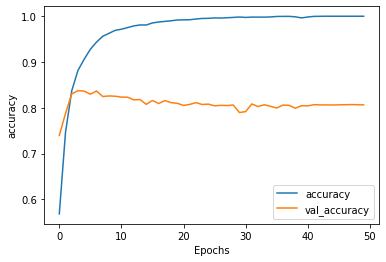

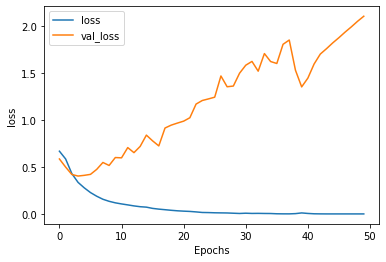

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 定义和运行LSTM model

In [26]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 15s 20ms/step - loss: 0.4975 - accuracy: 0.7446 - val_loss: 0.3602 - val_accuracy: 0.8437
Epoch 2/50
782/782 [==============================] - 14s 18ms/step - loss: 0.3092 - accuracy: 0.8745 - val_loss: 0.3708 - val_accuracy: 0.8382
Epoch 3/50
782/782 [==============================] - 15s 19ms/step - loss: 0.2458 - accuracy: 0.9061 - val_loss: 0.3851 - val_accuracy: 0.8373
Epoch 4/50
782/782 [==============================] - 15s 19ms/step - loss: 0.1976 - accuracy: 0.9277 - val_loss: 0.4368 - val_accuracy: 0.8302
Epoch 5/50
782/782 [==============================] - 15s 19ms/step - loss: 0.1607 - accuracy: 0.9432 - val_loss: 0.5118 - val_accuracy: 0.8300
Epoch 6/50
782/782 [==============================] - 15s 19ms/step - loss: 0.1360 - accuracy: 0.9528 - val_loss: 0.4996 - val_accuracy: 0.8119
Epoch 7/50
782/782 [==============================] - 14s 18ms/step - loss: 0.1065 - accuracy: 0.9640 - val_loss: 0.5259 - val_accuracy:

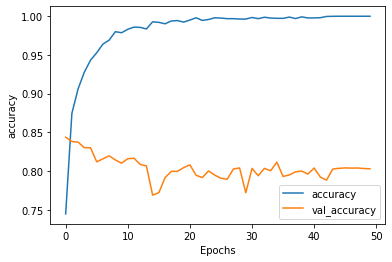

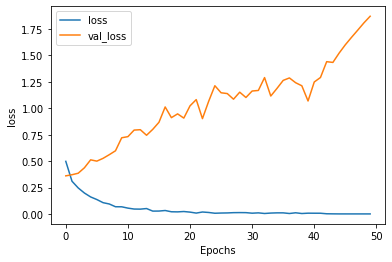

In [28]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 定义和运行Conv1D model

In [29]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [30]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 6s 7ms/step - loss: 0.4463 - accuracy: 0.7858 - val_loss: 0.3452 - val_accuracy: 0.8510
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2815 - accuracy: 0.8839 - val_loss: 0.4008 - val_accuracy: 0.8266
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 0.2286 - accuracy: 0.9121 - val_loss: 0.3956 - val_accuracy: 0.8335
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1910 - accuracy: 0.9294 - val_loss: 0.4340 - val_accuracy: 0.8295
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1530 - accuracy: 0.9454 - val_loss: 0.4802 - val_accuracy: 0.8249
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1239 - accuracy: 0.9582 - val_loss: 0.5722 - val_accuracy: 0.8178
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 0.0943 - accuracy: 0.9705 - val_loss: 0.6514 - val_accuracy: 0.8154
Epoch 

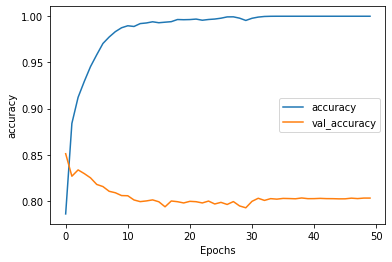

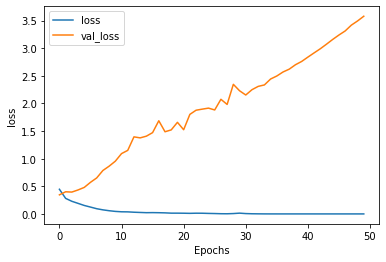

In [31]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')